# Import Libraries

In [122]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore


# Load and review data

In [123]:
bank_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df = bank_data

In [124]:
df.shape # Check number of columns and rows in data frame

(5000, 14)

In [125]:
df.head() # To check first 5 rows of data set

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# 1. Read the column description and ensure you understand each attribute well.

In [126]:
df.isnull().values.any() # If there are any null values in data set

False

This data has no null values.

In [127]:
df.info()  #info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The data has 5000 instances with 12 attributes. 11 integer type and 1 float type(Strings in the column)

In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [129]:
#Experience cannot be negative so we have to replace negative value with median
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [130]:
df[df['Experience'] < 0]['Experience'].count()

52

In [131]:
#In total we have 52 negative values so we have to fill this values with median
df['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
df['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
df['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )

In [132]:
df['Experience'].fillna(df['Experience'].median(),inplace=True)

# 2. Study the data distribution in each attribute, share your findings

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Above 5 point summary describes us:
1.Average age of customer is 45 years and maximum age is 67 years.
2.Experience is shown is in negative value which is might be a error because working experience cannot be a negative value.
3.Personal Loan, Securities Account, CD Account, Online, Credit Card all these columns are categorical variables which is clean.

#min value of experience column is 0, perviously which was in negative 

*Id and zip code can be dropped.
*Age and experience has much similarity dropping one of that will not effect dataframe.

In [134]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048718,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048718,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


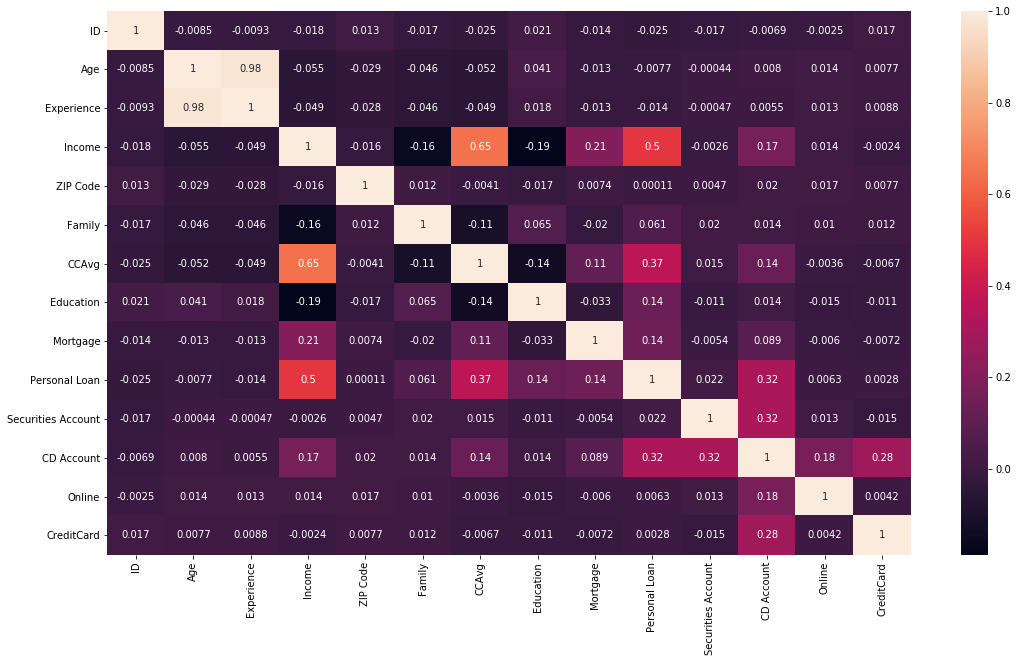

In [141]:
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), annot = True )

From Above heatmap we infer:
1.Age and Experience are highly correlated and the correlation is almost 1.
2.'Income' and 'CCAvg' is moderately correlated.
3.Personal Loan has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
4.There is association of 'CD Account' with 'Credit Card', 'Securities Account', 'Online', 'CCAvg' and 'Income'.
5.'Mortgage' has moderate correlation with 'Income'.
6.'Income' influences 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.

In [ ]:
#Data Visualisation with respect to personal loan as a hue

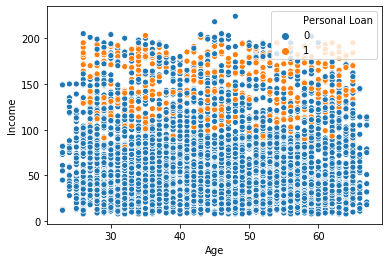

In [137]:
sns.scatterplot( x = 'Age',y = 'Income', data = df, hue = 'Personal Loan')

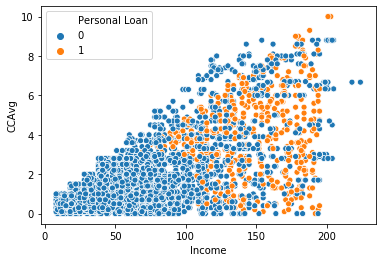

In [138]:
sns.scatterplot(x = 'Income', y = 'CCAvg', data = df, hue = 'Personal Loan')

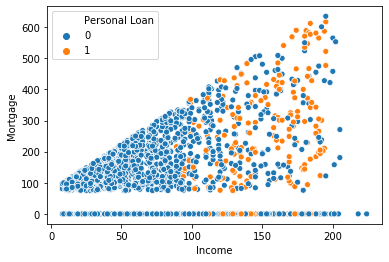

In [139]:
sns.scatterplot( x = 'Income',y = 'Mortgage', data = df, hue = 'Personal Loan')

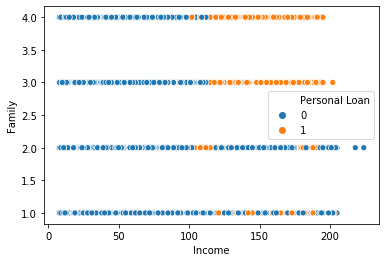

In [140]:
sns.scatterplot(y = 'Family', x = 'Income', data = df, hue = 'Personal Loan')

In [142]:
#Drop columns which does not effect our target column 'Personal' 
#Drop Id and Zip code
df = df.drop(['ID','ZIP Code'], axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1


In [147]:
df[['Income', 'CCAvg', 'Mortgage']] = df[['Income', 'CCAvg', 'Mortgage']] * 1000
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49000,4,1600.0,1,0,0,1,0,0,0
1,45,19.0,34000,3,1500.0,1,0,0,1,0,0,0
2,39,15.0,11000,1,1000.0,1,0,0,0,0,0,0
3,35,9.0,100000,1,2700.0,2,0,0,0,0,0,0
4,35,8.0,45000,4,1000.0,2,0,0,0,0,0,1


# 3. Get the target column distribution. 

In [143]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

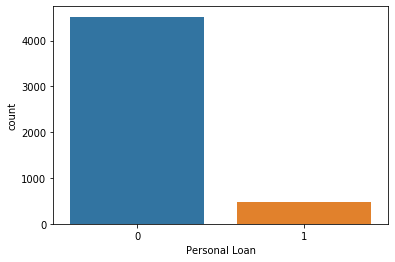

In [144]:
sns.countplot(data=df,x='Personal Loan')

In [153]:
no_sub = len(df[df['Personal Loan']==0])
print('count no subscription :',no_sub)
sub = len(df[df['Personal Loan']==1])
print('subscription :',sub)
pct_of_no_sub = no_sub/(no_sub+sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = sub/(no_sub+sub)
print("percentage of subscription", pct_of_sub*100)

count no subscription : 4520
subscription : 480
percentage of no subscription is 90.4
percentage of subscription 9.6


#Looking relation of other attributes with personal loan.

In [157]:
df.groupby(df['Personal Loan']).mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.367257,20.378982,66237.389381,2.373451,1729.008850,1.843584,51789.380531,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144745.833333,2.612500,3905.354167,2.233333,100845.833333,0.125000,0.291667,0.606250,0.297917


From above table we infer that:
1.People who took loan has double the income than who don't take loan.
2.Average spending on credit card bill is more of Loan takers.
3.Literacy rate is also more in loan takers.
4.Mortgage value is also double of people who took loan.

# Split the data into training and test set in the ratio of 70:30 respectively

In [158]:
# lets build our linear model
# independant variables
X = df.drop(['Personal Loan'], axis=1)
# the dependent variable
y = df['Personal Loan']

In [159]:
#split X and y in training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [163]:
#Let's check split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [166]:
#Now lets check Personal Loan True/False ratio in split data

print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 1]), (len(df.loc[df['Personal Loan'] == 1])/len(df.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal Loan'] == 0]), (len(df.loc[df['Personal Loan'] == 0])/len(df.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

### Logistic Regression

In [168]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5             6  \
0 -0.199563  0.180873  0.000028 -0.004333  0.000098  0.016931  8.125485e-07   

          7         8         9        10  intercept  
0 -0.000802  0.018294 -0.012339 -0.005755  -0.020988  


In [169]:
model_score = model.score(X_test, y_test)
print(model_score)

0.894


### Build kNN Model

In [171]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [172]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

Evaluate Performance of kNN Model

In [173]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8846666666666667

In [174]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

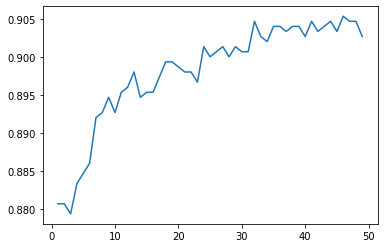

In [175]:
plt.plot(range(1,50),scores)

### Train Naive Bayes algorithm

In [178]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
loan_model = GaussianNB()

loan_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

Performance of our model with training data

In [179]:
loan_train_predict = loan_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, loan_train_predict)))
print()

Model Accuracy: 0.8949



Performance of our model with testing data

In [180]:
loan_test_predict = loan_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, loan_test_predict)))
print()

Model Accuracy: 0.8747



# 6. Print the confusion matrix for all the above models

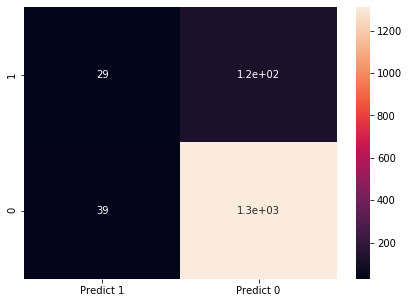

In [181]:
#confusion metrix from logistic regression
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they do have Personal Loan 29

True Negatives (TN): we correctly predicted that they don't have Personal Loan 133

False Positives (FP): we incorrectly predicted that they do have Personal Loan (a "Type I error") 39 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have Personal Loan (a "Type II error") 122 Falsely predict negative Type II error

# 7. Give your reasoning on which is the best model in this case and why it performs better? 

Logistic Regression Model is Best as it's accuracy is highest and it is more compatible than KNN and Naive Bayes.